## ----------------------------------------------------------
# 1. EXPLORATORY DATA ANALYSIS PLAN
## ----------------------------------------------------------
## 2. Load dataset and review structure (columns, datatypes, nulls)
## 3. Identify and quantify outliers using IQR method
## 4. Compute descriptive statistics for numeric fields (Salary, Experience)
## 5. Visualize distributions (histograms, boxplots)
## 6. Examine relationships (Salary vs Experience, Salary vs Level)
## 7. Compare summary statistics by Gender
## 8. Assess correlations among key variables
## ----------------------------------------------------------

# 2. Load Dataset and Review Structure

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
pd.options.display.float_format = '{:,.2f}'.format

df = pd.read_excel('Salaries.xlsx', engine='openpyxl')

print('-'*45)
print('Dataset Header Preview')
print('-'*45)
print(df.head(), '\n')

print('-'*45)
print('Dataset Info and Column Types')
print('-'*45)
print(df.info(), '\n')

print('-'*45)
print('Summary Statistics')
print('-'*45)
print(df.describe(), '\n')

---------------------------------------------
Dataset Header Preview
---------------------------------------------
   Salary Gender  Experience Level
0   32368      F           3     B
1   53174      M          10     B
2   52722      M          10     A
3   53423      M           1     B
4   50602      M           5     B 

---------------------------------------------
Dataset Info and Column Types
---------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Salary      71 non-null     int64 
 1   Gender      71 non-null     object
 2   Experience  71 non-null     int64 
 3   Level       71 non-null     object
dtypes: int64(2), object(2)
memory usage: 2.3+ KB
None 

---------------------------------------------
Summary Statistics
---------------------------------------------
         Salary  Experience
count     71.

# 3. Identify and Quantify Outliers (IQR Method)

In [5]:
# Check for missing, duplicate, or extreme values that might bias analysis

print(f"{'-'*45}\nInspect for Missing Data\n{'-'*45}")
print(f"{df.isnull().sum()}\n")
print(f"{'-'*45}\nInspect for Duplicates\n{'-'*45}")
print(f"There are {df.duplicated().sum()} duplicated values\n")
print(f"{'-'*45}\nInspect for Outliers\n{'-'*45}")
for col in ['Salary', 'Experience']:
    if col in df.columns:
        Q1 = df[col].quantile(0.25)
        Q2 = df[col].quantile(0.75)
        IQR = Q2 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q2 + 1.5 * IQR
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        print(f"Outliers in {col}: {len(outliers)} found")
        print(outliers[[col]].head())

---------------------------------------------
Inspect for Missing Data
---------------------------------------------
Salary        0
Gender        0
Experience    0
Level         0
dtype: int64

---------------------------------------------
Inspect for Duplicates
---------------------------------------------
There are 12 duplicated values

---------------------------------------------
Inspect for Outliers
---------------------------------------------
Outliers in Salary: 0 found
Empty DataFrame
Columns: [Salary]
Index: []
Outliers in Experience: 0 found
Empty DataFrame
Columns: [Experience]
Index: []


# 4. Univariate Analysis - Salary and Experience

In [7]:
# Understand the Distribution, Spread, and Shape of Numeric Variables

spread_salary = df['Salary'].max() - df['Salary'].min()
spread_experience = df['Experience'].max() - df['Experience'].min()

summary_table = pd.DataFrame({
    'Statistic': [
        'Min:',
        'Max:',
        'Mean:',
        'Median:',
        'Mode:',
        'Spread:',
        'Variance:',
        'Standard Deviation:',
        'Skewness:',
        'Kurtosis:'
    ],
    'Salary  ': [
        f"${df['Salary'].min():,.2f}",
        f"${df['Salary'].max():,.2f}",
        f"${df['Salary'].mean():,.2f}",
        f"${df['Salary'].median():,.2f}",
        f"${df['Salary'].mode()[0]:,.2f}",
        f"${spread_salary:,.2f}",
        f"${df['Salary'].var():,.2f}",
        f"${df['Salary'].std():,.2f}",
        f"{df['Salary'].skew():,.2f}",
        f"{df['Salary'].kurtosis():,.2f}"
    ],
    '   Experience': [
        f"{df['Experience'].min():,.2f}yrs",
        f"{df['Experience'].max():,.2f}yrs",
        f"{df['Experience'].mean():,.2f}yrs",
        f"{df['Experience'].median():,.2f}yrs",
        f"{df['Experience'].mode()[0]:,.2f}yrs",
        f"{spread_experience:,.2f}yrs",
        f"{df['Experience'].var():,.2f}yrs",
        f"{df['Experience'].std():,.2f}yrs",
        f"{df['Experience'].skew():,.2f}",
        f"{df['Experience'].kurtosis():,.2f}"
    ]
})

print ('-' * 60)
print ('Descriptive Univariate Statistics for Salary and Experience')
print ('-' * 60)
print (summary_table.to_string(index=False))

------------------------------------------------------------
Descriptive Univariate Statistics for Salary and Experience
------------------------------------------------------------
          Statistic        Salary      Experience
               Min:      $23,975.00       0.00yrs
               Max:      $62,530.00      10.00yrs
              Mean:      $45,141.51       5.75yrs
            Median:      $49,033.00       5.00yrs
              Mode:      $49,033.00      10.00yrs
            Spread:      $38,555.00      10.00yrs
          Variance: $116,766,466.80      10.51yrs
Standard Deviation:      $10,805.85       3.24yrs
          Skewness:           -0.77         -0.05
          Kurtosis:           -0.64         -1.31


# 5. Visualize Distributions
## Identify distribution shape, skewness and differences between job levels and genders.

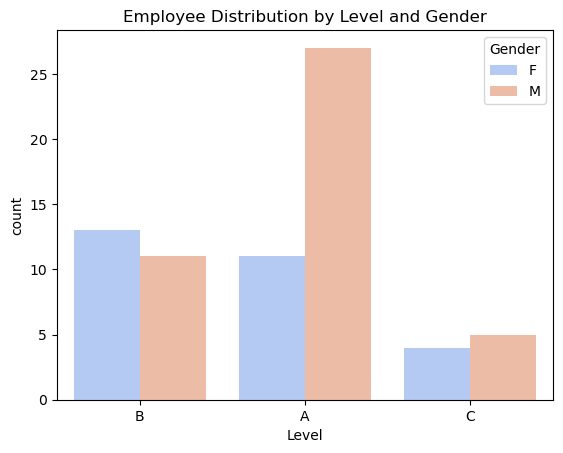

In [9]:
# Distribution by Level and Gender
sns.countplot(x='Level', hue='Gender', data=df, palette='coolwarm')
plt.title('Employee Distribution by Level and Gender')
plt.show()

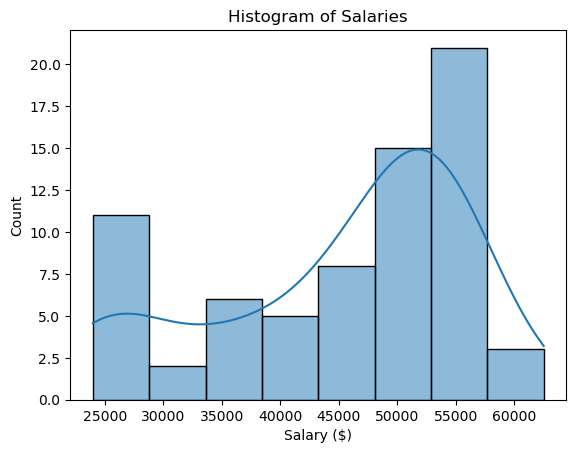

In [10]:
# Salary Histogram

sns.histplot(df['Salary'], kde = True)
plt.title('Histogram of Salaries')
plt.xlabel('Salary ($)')
plt.show()

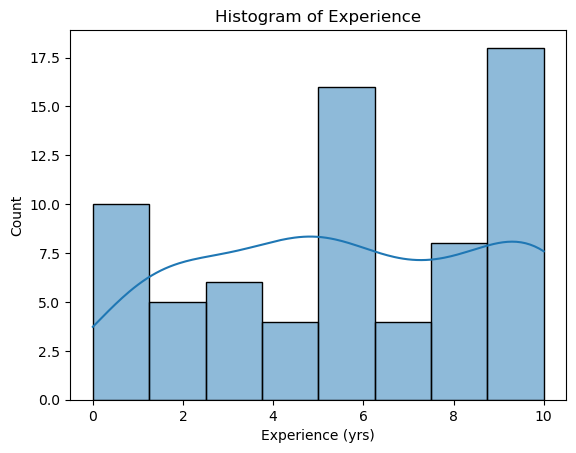

In [11]:
# Experience Histogram

sns.histplot(df['Experience'], kde = True)
plt.title('Histogram of Experience')
plt.xlabel('Experience (yrs)')
plt.show()

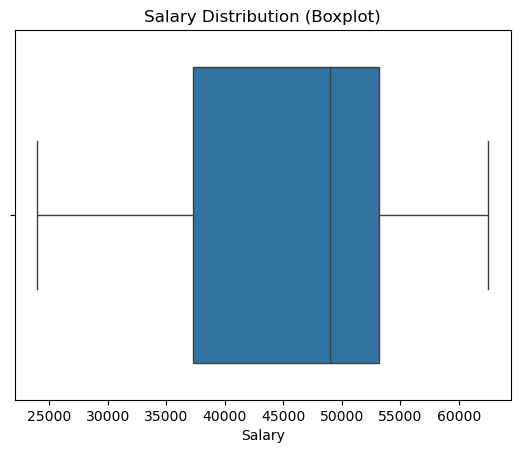

In [12]:
# Salary Boxplot

sns.boxplot(x='Salary', data=df)
plt.title('Salary Distribution (Boxplot)')
plt.show()

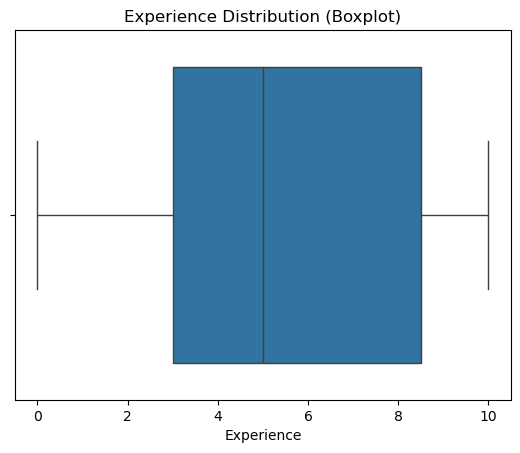

In [13]:
# Experience Boxplot

sns.boxplot(x='Experience', data=df)
plt.title('Experience Distribution (Boxplot)')
plt.show()

# 6. Gender Comparison Summary
## Compare central tendancy and variabilty of Salary and Experience by Gender

# Multivariate Analysis 

In [16]:
# Calculate Statistics by Gender

summary_by_gender = df.groupby('Gender').agg({
    'Salary':['min', 'max', 'median', lambda x: x.mode()[0], 'std'],
    'Experience':['min', 'max', 'median', lambda x: x.mode()[0], 'std']
}).round(2)

# Renaming columns for clarity
summary_by_gender.columns = [
    'Salary: Min    $', 'Salary: Max    $', 'Salary: Median $', 'Salary: Mode   $', 'Salary: StdDev $',
    'Exp: Min', 'Exp: Max', 'Exp: Median', 'Exp: Mode', 'Exo: StdDev'
]

# Pivot Table by Gender
summary_by_gender = summary_by_gender.transpose()

# Output
print('-' * 60)
print(f"Descriptive Statistics for Salary and Experience by Gender")
print(f'-' * 60)
print(summary_by_gender.to_string())

------------------------------------------------------------
Descriptive Statistics for Salary and Experience by Gender
------------------------------------------------------------
Gender                   F         M
Salary: Min    $ 23,975.00 24,395.00
Salary: Max    $ 58,968.00 62,530.00
Salary: Median $ 41,188.00 51,237.00
Salary: Mode   $ 27,525.00 53,174.00
Salary: StdDev $ 12,084.27  8,207.50
Exp: Min              1.00      0.00
Exp: Max             10.00     10.00
Exp: Median           5.00      8.00
Exp: Mode             3.00     10.00
Exo: StdDev           2.57      3.50


# 7. Multivariate and Correlation Analysis
## Evaluate linear relationships among variables 

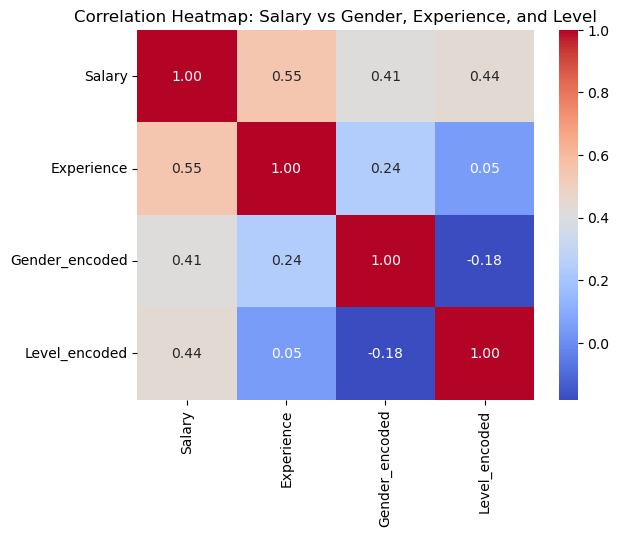

In [18]:
# Calculate Correlation matrix

df['Gender_encoded'] = df['Gender'].map({'M': 1, 'F': 0})
df['Level_encoded'] = df['Level'].map({'A': 1, 'B': 2, 'C': 3})
corr = df[['Salary', 'Experience', 'Gender_encoded', 'Level_encoded']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap: Salary vs Gender, Experience, and Level')
plt.show()

[Text(0.5, 1.0, 'Salary vs Experience by Gender'),
 Text(0.5, 0, 'Experience (years)'),
 Text(0, 0.5, 'Salary ($)')]

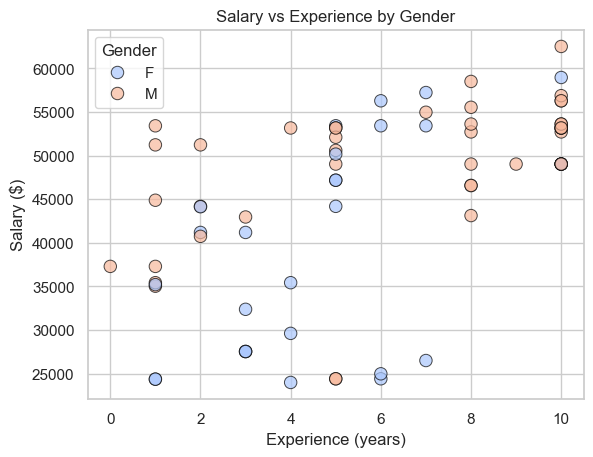

In [19]:
# Visualize the relationship between Salary and Experience distinguished by Gender
sns.set(style='whitegrid')

sns.scatterplot(
    x='Experience',
    y='Salary',
    hue='Gender',
    data=df,
    palette='coolwarm',
    s=80,
    alpha=0.7,
    edgecolor='black'
).set(
    title='Salary vs Experience by Gender',
    xlabel='Experience (years)',
    ylabel='Salary ($)'
)

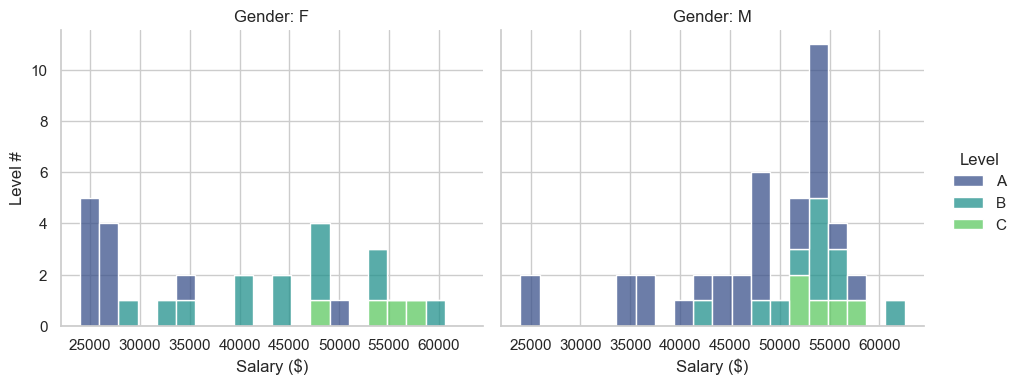

In [24]:
# Side-by-Side Histogram by Gender of Levels vs Salaries
sns.displot(
    data=df,
    x='Salary',
    hue='Level',
    hue_order=sorted(df['Level'].unique()),
    col='Gender',
    kind='hist',
    multiple='stack',
    palette='viridis',
    bins=20,
    height=4,
    aspect=1.2
).set_titles("Gender: {col_name}").set_axis_labels("Salary ($)", "Level #")

# 8. Regression and Coefficient of Variation

Text(0.5, 1.0, 'Salary vs Experience with Regression Line')

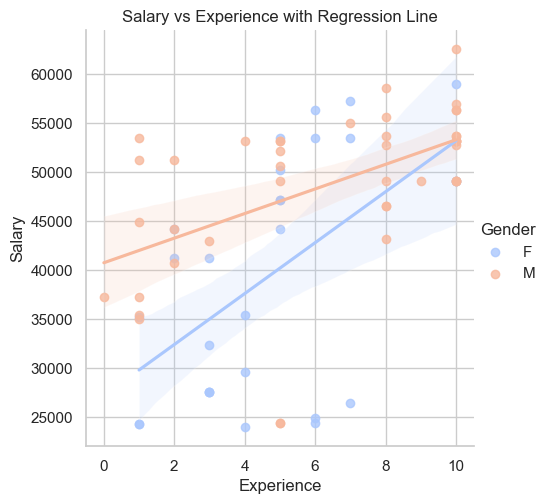

In [27]:
# Regression of Salary - Experience

sns.lmplot(x='Experience', y='Salary', hue='Gender', data=df, palette='coolwarm')
plt.title('Salary vs Experience with Regression Line')

In [28]:
#Coefficient of Variation (relative spread)

cv = df[['Salary','Experience']].std()/df[['Salary','Experience']].mean()
print("Coefficient of Variation:\n", cv)

Coefficient of Variation:
 Salary       0.24
Experience   0.56
dtype: float64


In [31]:
#8. Summary Interpretation (Pseudocode)

# INTERPRETATION SUMMARY
# ----------------------------------------------------------
# - No missing or extreme outlier data detected.
# - Salary distribution slightly left-skewed; experience roughly symmetric.
# - Average salary ~45K; average experience ~6 years.
# - Males show higher median salary and experience than females.
# - Salary correlates moderately with experience and job level.
# - Gender correlation weaker but still evident in dispersion.
# - Overall, pay differences appear structured by level more than gender.
# ----------------------------------------------------------
print('-'*60)
print('End of Exploratory Data Analysis – All Objectives Complete.')
print('-'*60)

------------------------------------------------------------
End of Exploratory Data Analysis – All Objectives Complete.
------------------------------------------------------------
